In [54]:
import pandas as pd #data frame
import seaborn as sns # analysis / visualization
from matplotlib import pyplot as plt  # ploting
import numpy as np       # linear algebra calculation
from sklearn.model_selection import train_test_split as tts  # data spliting
from sklearn.tree import DecisionTreeClassifier # decision tree algoritm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings as w
w.filterwarnings('ignore')

In [55]:
df = pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [56]:
df.shape

(299, 13)

In [57]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

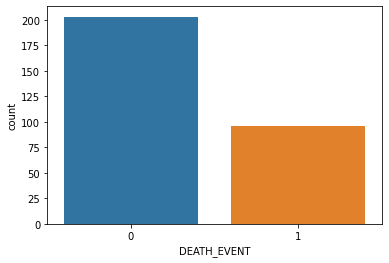

In [58]:
sns.countplot(df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

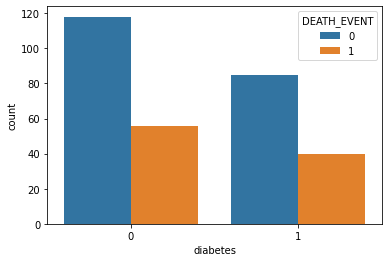

In [59]:
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

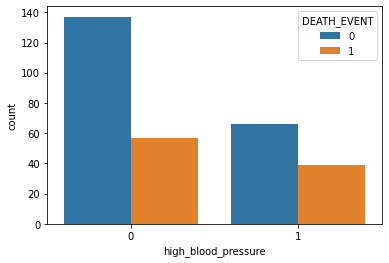

In [60]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)


<AxesSubplot:xlabel='anaemia', ylabel='count'>

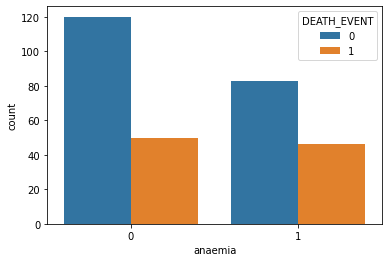

In [61]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='smoking', ylabel='count'>

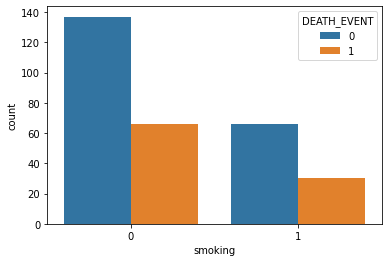

In [62]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)

In [63]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:title={'center':'Correlation for Every Column'}>

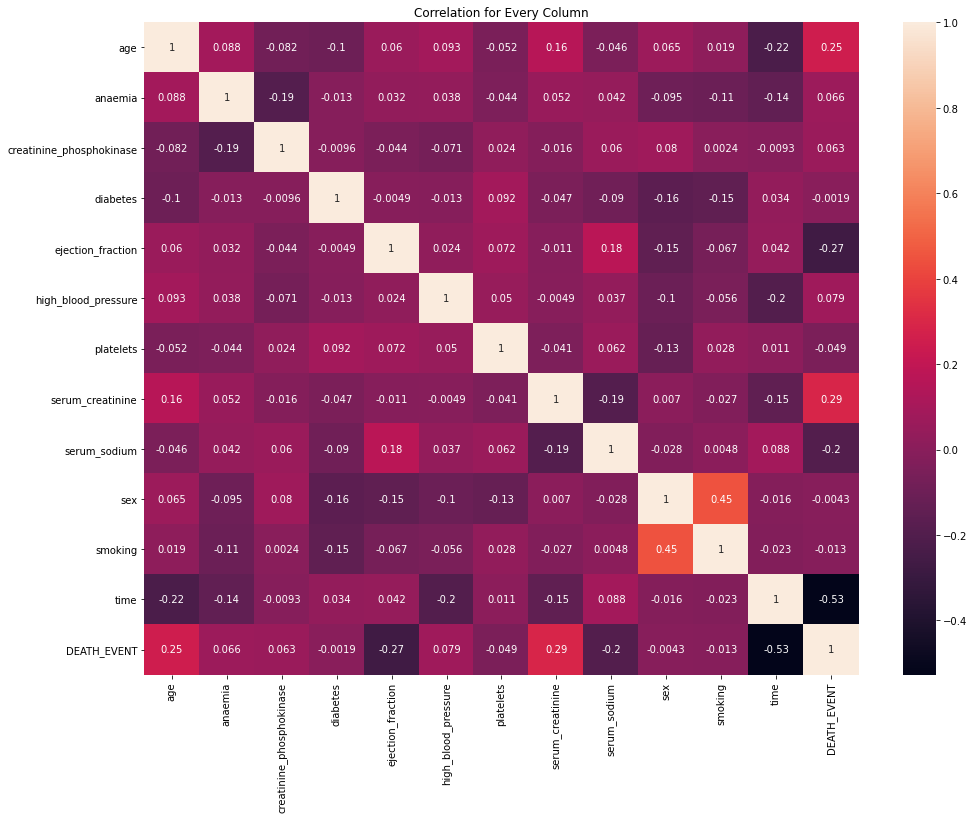

In [64]:
plt.figure(figsize=(16,12))
plt.title('Correlation for Every Column')
sns.heatmap(df.corr() , annot=True)

# Seperate X, Y

In [65]:
x = df.drop('DEATH_EVENT', axis='columns')

In [66]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [67]:
y = df['DEATH_EVENT']

In [68]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split the dataset into train and test

In [69]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state=1)

In [70]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [71]:
xtrain.shape

(209, 12)

In [72]:
xtest.shape

(90, 12)

In [73]:
clf = DecisionTreeClassifier() # creating object for decision tree

In [74]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

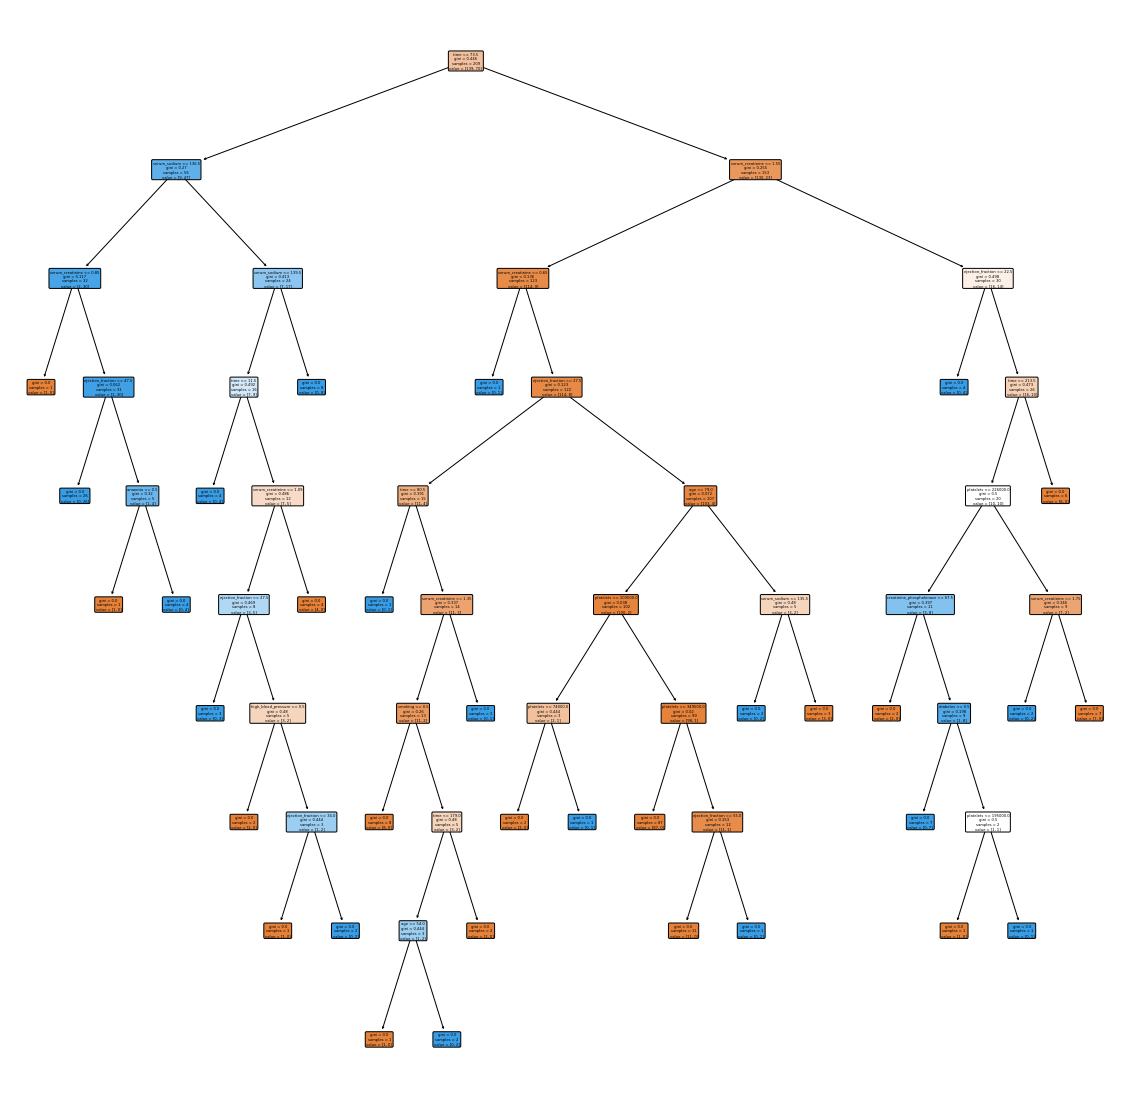

In [75]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)
plt.savefig('tree.png', dpi=1200)

In [76]:
pred = clf.predict(xtest)

In [77]:
pred # predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [78]:
np.array(ytest) # actual result

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

# Confusion Matrix

In [79]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [80]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.84      0.85        64\n           1       0.63      0.65      0.64        26\n\n    accuracy                           0.79        90\n   macro avg       0.74      0.75      0.75        90\nweighted avg       0.79      0.79      0.79        90\n'

In [81]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        64
           1       0.63      0.65      0.64        26

    accuracy                           0.79        90
   macro avg       0.74      0.75      0.75        90
weighted avg       0.79      0.79      0.79        90



In [82]:
cm = confusion_matrix(ytest, pred)

In [83]:
cm

array([[54, 10],
       [ 9, 17]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

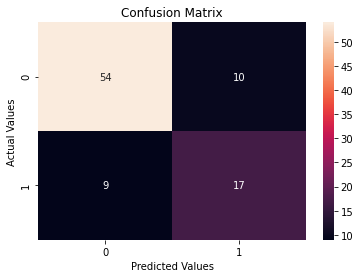

In [84]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [85]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [86]:
tp

54

In [87]:
fn

10

In [88]:
fp

9

In [89]:
tn

17

# Home Work

In [90]:
# All performance parameters from slide

In [91]:
accuracy = (tp+tn)/(tp+fn+fp+tn) # accuracy
print(accuracy)

0.7888888888888889


In [92]:
ppv = tp/tp+fp #precision
print(ppv)

10.0


In [93]:
tpr = tp/tp+fn # True positive rate
print(tpr)

11.0


In [94]:
fpr = fp/fp+tn # false postive rate
print(fpr)

18.0


In [95]:
f1_measure= (ppv+tpr)/2 # F1_Measure = (precision+Recall)/2
print(f1_measure)

10.5


In [96]:
f1_score=(2*ppv*tpr)/(ppv+tpr) #F1_score= (2*Precision*Recall)/9Precision+Recall)
print(f1_score)

10.476190476190476


In [97]:
specifity = tn/(fp+tn) # True Negative Rate
print(specifity)

0.6538461538461539


In [98]:
CSI = tp/(tp+fn+fp)
print(CSI)

0.7397260273972602


In [99]:
fdr = fp/(tp+fp) # False Discovery rate
print(fdr)

0.14285714285714285


# AUC

In [100]:
from sklearn.metrics import plot_roc_curve

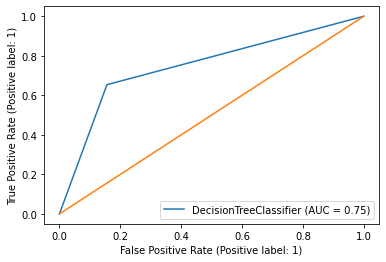

In [101]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])

In [102]:
accuracy_score(ytest, pred)

0.7888888888888889

In [103]:
clf.score(xtest, ytest)

0.7888888888888889

In [104]:
(tp+tn) / (tp+tn+fp+fn)

0.7888888888888889